# Exploratory Data Analysis (EDA) and Hypothesis Testing

**Importing Data and Libraries**

Import the dataset and essential libraries like Pandas, NumPy, Matplotlib, and Seaborn using a Jupyter notebook.

In [ ]:
import pandas as pd
df = pd.read_csv('online_shoppers_intention.csv')

**Exploratory Data Analysis (EDA)**

Examine the dataset’s structure, compute summary statistics, and visualize distributions.

In [ ]:
print(df)

       Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000 

*Structure*

The dataset has 18 columns with a mix of numeric, categorical, and boolean data. There are no apparent missing values in the sample.

*Summary Statistics*

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# display summary statistics
print(df.describe(include='all'))

        Administrative  Administrative_Duration  Informational  \
count     12330.000000             12330.000000   12330.000000   
unique             NaN                      NaN            NaN   
top                NaN                      NaN            NaN   
freq               NaN                      NaN            NaN   
mean          2.315166                80.818611       0.503569   
std           3.321784               176.779107       1.270156   
min           0.000000                 0.000000       0.000000   
25%           0.000000                 0.000000       0.000000   
50%           1.000000                 7.500000       0.000000   
75%           4.000000                93.256250       0.000000   
max          27.000000              3398.750000      24.000000   

        Informational_Duration  ProductRelated  ProductRelated_Duration  \
count             12330.000000    12330.000000             12330.000000   
unique                     NaN             NaN           

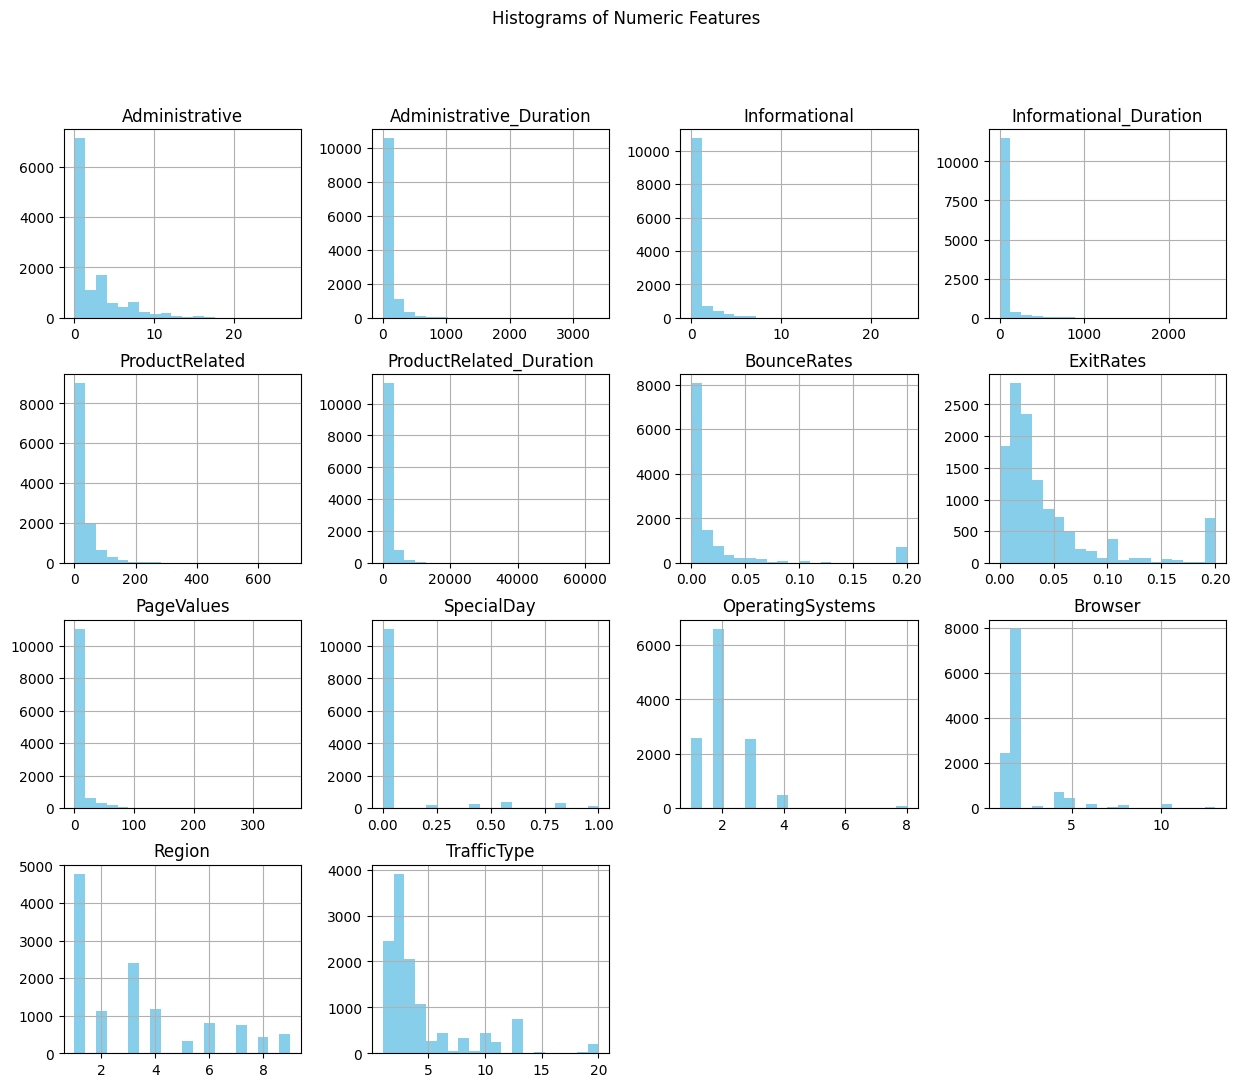

In [ ]:
# visualizing Distributions
# plot histograms for numeric columns
df.hist(bins=20, figsize=(15, 12), color='skyblue')
plt.suptitle('Histograms of Numeric Features')
plt.show()

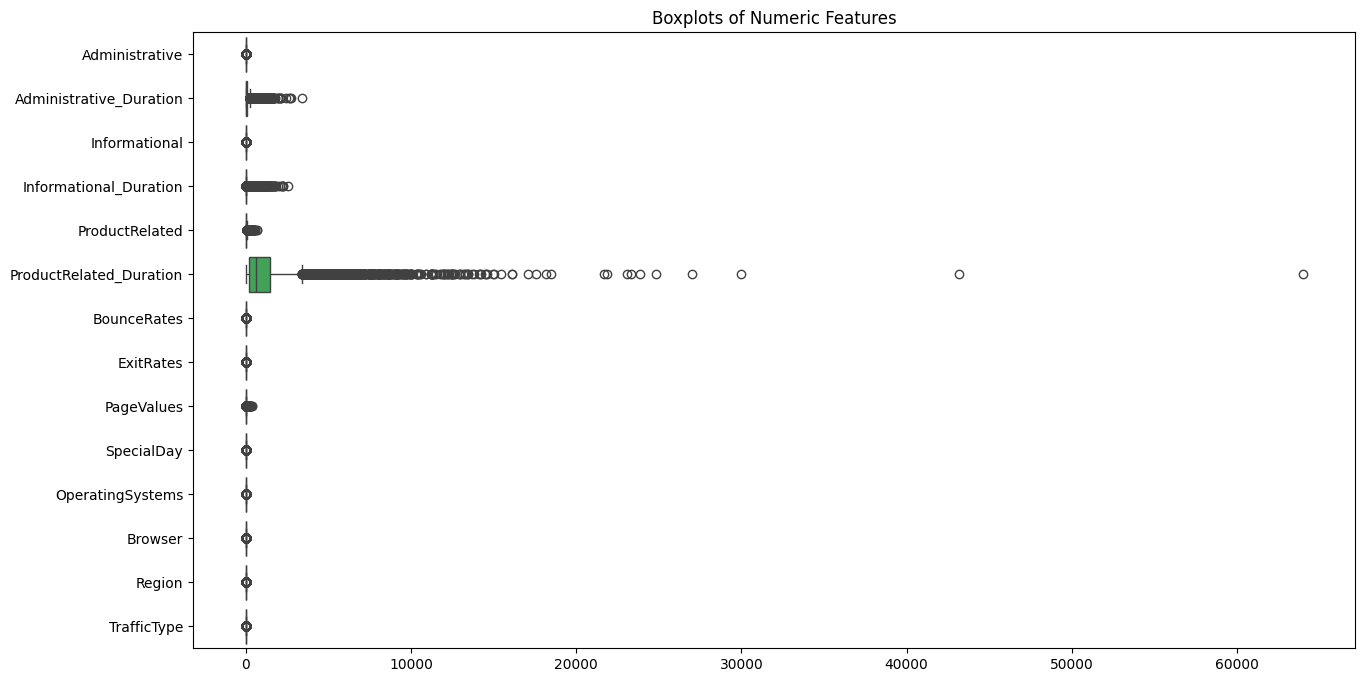

In [ ]:
# plot boxplots for numeric columns to check for outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.select_dtypes(include='number'), orient='h')
plt.title('Boxplots of Numeric Features')
plt.show()

<ipython-input-10-190a32eb6fad>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


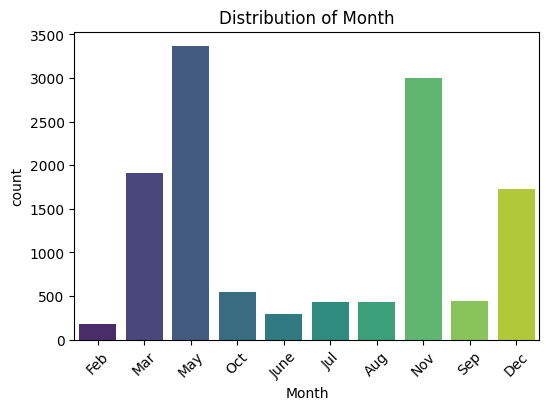

<ipython-input-10-190a32eb6fad>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


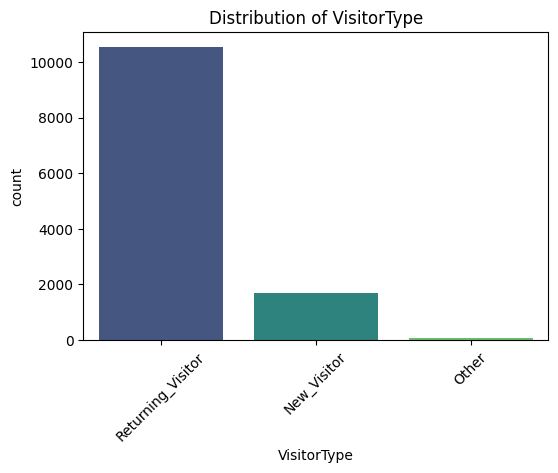

In [ ]:
# visualize categorical distributions
categorical_columns = df.select_dtypes(include='object').columns
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

Administrative and Informational
- Most visitors didn't engage with administrative or informational pages, as evidenced by the median (50%) value of 0
- However, the max values (27 administrative pages and 24 informational pages) show that some users interacted extensively with these pages
- The high standard deviation suggests significant variability in user behavior

ProductRelated
- The median number of product-related pages is 18, indicating higher engagement with product pages than other sections
- The large maximum (705 pages) and high standard deviation suggest a small group of highly engaged users.

Administrative_Duration and Informational_Duration
- The median duration is 0 seconds for both, indicating that many users didn't spend time on these pages
- However, a few users spent a long time, reflected in a high max values (3398s for Administrative and 2549s for Informational)

ProductRelated_Duration
- The median time spent is around 599 seconds (approximately 10 minutes), suggesting a significant time exploring products
- Outliers spent extreme amounts of time (up to 640000 seconds or ~18 hours)

Month
- May had the highest number of visits (3364)
- This could be linked to summer sales or product launches

VisitorType
- The majority of visitors were Returning_Visitors (85%)
- This suggests good retention, but potentially fewer new user acquisations

Weekend
- Most visits ocurred on weekdays (77%)
- This could imply that users browse during work hours, possibly for business-related purchases

Revenue
- Only a small percentage of sessions resulted in revenue (15.4%), suggesting that many users browse without completing a purchase

**Hypothesis Formulation**

Develop hypotheses based on the observed data patterns and relationships.


1. Returning visitors are more likely to generate revenue compared to new visitors.
- Null hypothesis (H0): There is no significant difference in revenue generation between returning and new visitors
- Alternative hypothesis (H1): Returning visitors are more likely to generate revenue

2. Visitors who browse more product-related pages spend more time on the website.
- Null Hypothesis (H0): There is no correlation between the number of product-related pages and the total duration spent
- Alternative Hypothesis (H1): There is a positive correlation between product-related pages and duration

3. Bounce rates are higher for visitors who do not generate revenue.
- Null Hypothesis (H0): There is no significant difference in bounce rates between visitors who generate revenue and those who don’t
- Alternative Hypothesis (H1): Visitors who don’t generate revenue tend to have higher bounce rates

**Hypothesis Testing**

Employ statistical tests or visual methods to examine your hypotheses and discuss the outcomes.


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, pearsonr

# Hypothesis 1: Returning Visitors and Revenue
table = pd.crosstab(df['VisitorType'], df['Revenue'])
chi2, p_val, _, _ = chi2_contingency(table)
print(f"Chi-Square Test for VisitorType and Revenue: p-value = {p_val}")

# Hypothesis 2: Correlation between Product Pages and Duration
corr, p_val_corr = pearsonr(df['ProductRelated'], df['ProductRelated_Duration'])
print(f"Correlation between Product Pages and Duration: r = {corr}, p-value = {p_val_corr}")

# Hypothesis 3: Correlation between Bounce Rates and Revenue
corr_bounce, p_val_bounce = pearsonr(df['BounceRates'], df['Revenue'].astype(int))
print(f"Correlation between Bounce Rates and Revenue: r = {corr_bounce}, p-value = {p_val_bounce}")

if p_val < 0.05:
    print("Reject the null hypothesis for Hypothesis 1: Significant relationship between visitor type and revenue.")
else:
    print("Fail to reject the null hypothesis for Hypothesis 1.")

if p_val_corr < 0.05:
    print("Reject the null hypothesis for Hypothesis 2: Significant correlation between product pages and duration.")
else:
    print("Fail to reject the null hypothesis for Hypothesis 2.")

if p_val_bounce < 0.05:
    print("Reject the null hypothesis for Hypothesis 3: Significant correlation between bounce rates and revenue.")
else:
    print("Fail to reject the null hypothesis for Hypothesis 3.")


Chi-Square Test for VisitorType and Revenue: p-value = 4.269904152293867e-30
Correlation between Product Pages and Duration: r = 0.86092683617637, p-value = 0.0
Correlation between Bounce Rates and Revenue: r = -0.1506729119260538, p-value = 1.5941975385164637e-63
Reject the null hypothesis for Hypothesis 1: Significant relationship between visitor type and revenue.
Reject the null hypothesis for Hypothesis 2: Significant correlation between product pages and duration.
Reject the null hypothesis for Hypothesis 3: Significant correlation between bounce rates and revenue.


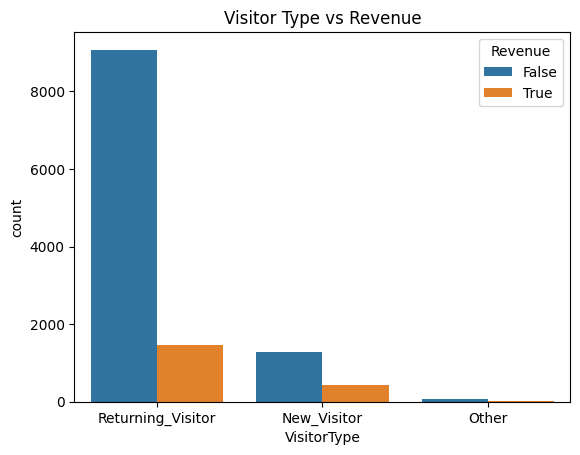

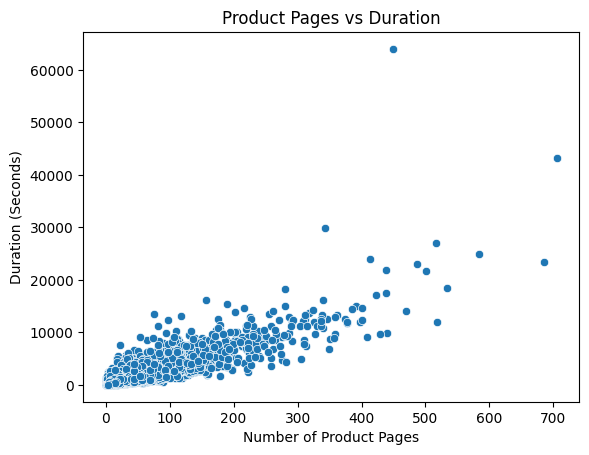

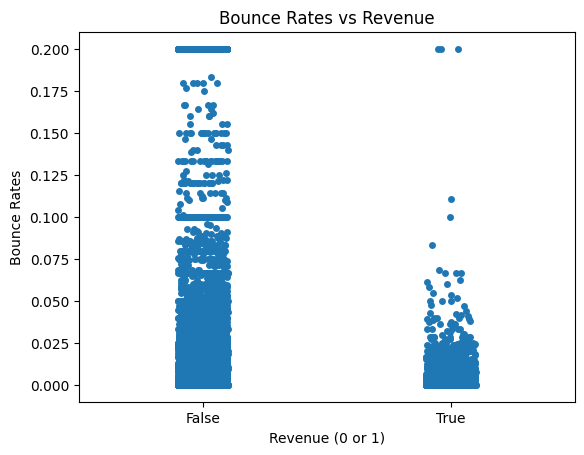

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hypothesis 1
sns.countplot(x='VisitorType', hue='Revenue', data=df)
plt.title('Visitor Type vs Revenue')
plt.show()

# Hypothesis 2
sns.scatterplot(x='ProductRelated', y='ProductRelated_Duration', data=df)
plt.title('Product Pages vs Duration')
plt.xlabel('Number of Product Pages')
plt.ylabel('Duration (Seconds)')
plt.show()

# Hypothesis 3
sns.stripplot(x='Revenue', y='BounceRates', data=df, jitter=True)
plt.title('Bounce Rates vs Revenue')
plt.xlabel('Revenue (0 or 1)')
plt.ylabel('Bounce Rates')
plt.show()

**Documentation and Reporting**

Thoroughly document the analysis process in the Jupyter notebook, including code, visualizations, and interpretations. Summarize and report your findings clearly, stating whether the data supports or refutes your hypotheses.



*Hypothesis 1*

The p-value = 4.27e-30. Since the p-value is extremely small, we reject the null hypothesis. Thus, we can conclude that there is a significant relationship between the type of visitor and whether they made a purchase, suggesting that Returning Visitors are more likely to convert into a purchase.

*Hypothesis 2*

The r = 0.861 and the p-value is 0.0. The correlation is very strong (near 1), and the p-value is effectively 0, which means we reject the null hypothesis. Thus, we can conclude that there is a strong correlation between the number of product pages viewed and the duration of time spent on the website. This suggests that users who view more product pages tend to spend more time on the website.

*Hypothesis 3*

The r = -0.151 and the p-value = 1.59e-63. The correlation is negative, though weak, and the p-value is extremely small, meaning we reject the null hypothesis. Thus, we can conclude that there is a significant negative correlation between bounce rates and revenue. This suggests that higher bounce rates are associated with a lower likelihood of revenue generation (i.e. a purchase).